In [1]:
import shap
import pandas
import keras


from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import GroupKFold


keras.__version__
shap.initjs()


c:\Users\aoife\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

dataset = pandas.read_csv(folder_path + 'normalised_activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values
y = dataset['ssq_score'].values


In [3]:
print(len(X), len(y))

groups = dataset['participantId'].values

feature_names = ['bodyMass_kg','height_m','bmi','mean_hr/s','max_hr','min_hr','totalSteps','totalDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']


664 664


In [4]:
'''l1size = 10
l2size = 5'''

'''l1size = 30
l2size = 15
l3size = 5'''

l1size = 30
l2size = 30
l3size = 15
l4size = 5


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_participants = np.unique(groups)
train_val_groups, test_groups = train_test_split(unique_participants, test_size=0.2, random_state=42) # 0.2 test
train_groups, val_groups = train_test_split(train_val_groups, test_size=0.25, random_state=42) # 0.2 val


def filter_data(groups, group_labels, X, y):
    mask = np.isin(groups, group_labels)
    return X[mask], y[mask]

X_train, y_train = filter_data(groups, train_groups, X, y)
X_val, y_val = filter_data(groups, val_groups, X, y)
X_test, y_test = filter_data(groups, test_groups, X, y)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
import keras

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(l1size, activation='relu'))
model.add(Dense(l2size, activation='relu'))
model.add(Dense(l3size, activation='relu'))
model.add(Dense(l4size, activation='relu'))
model.add(Dense(1, activation='linear'))

optm = SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_val, y_val))

'''predict_train = model.predict(X_train)
predict_val = model.predict(X_val)

train_rmse_history = history.history['root_mean_squared_error']
val_rmse_history = history.history['val_root_mean_squared_error']
train_mse_history = history.history['loss']
val_mse_history = history.history['val_loss']'''

final_test_metrics = model.evaluate(X_test, y_test, verbose=1)
final_test_mse = final_test_metrics[0]
final_test_rmse = final_test_metrics[1]

print("Final Test MSE:", final_test_mse)
print("Final Test RMSE:", final_test_rmse)


Epoch 1/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1696 - root_mean_squared_error: 0.3972 - val_loss: 0.0815 - val_root_mean_squared_error: 0.2854
Epoch 2/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0527 - root_mean_squared_error: 0.2292 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2917
Epoch 3/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0472 - root_mean_squared_error: 0.2170 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2857
Epoch 4/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0453 - root_mean_squared_error: 0.2123 - val_loss: 0.0823 - val_root_mean_squared_error: 0.2869
Epoch 5/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0443 - root_mean_squared_error: 0.2089 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2752
Epoch 6/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0432 - root_mean_squared_error: 0.2072 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2705
Epoch 7/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [7]:
def model_predict(data):
    return model.predict(data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(43, 46)
[[0.12914961 0.64433824 0.13087932 ... 1.         0.         1.        ]
 [0.12571969 0.66301471 0.1203269  ... 0.         0.         1.        ]
 [0.14643465 0.68169118 0.13257885 ... 0.         0.         1.        ]
 ...
 [0.12714803 0.635      0.13266854 ... 0.         1.         1.        ]
 [0.09071811 0.635      0.0946569  ... 0.         0.         1.        ]
 [0.11143307 0.66301471 0.10665311 ... 0.         0.         1.        ]]


  0%|          | 0/43 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step


  2%|▏         | 1/43 [00:08<06:02,  8.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


  5%|▍         | 2/43 [00:18<06:21,  9.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


  7%|▋         | 3/43 [00:31<07:16, 10.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


  9%|▉         | 4/43 [00:42<07:03, 10.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 12%|█▏        | 5/43 [00:52<06:52, 10.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6682/6682 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 14%|█▍        | 6/43 [01:02<06:30, 10.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
6682/6682 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


 16%|█▋        | 7/43 [01:26<08:48, 14.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 19%|█▊        | 8/43 [01:42<08:55, 15.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 21%|██        | 9/43 [01:52<07:39, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 23%|██▎       | 10/43 [02:08<07:49, 14.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 26%|██▌       | 11/43 [02:18<07:02, 13.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 28%|██▊       | 12/43 [02:31<06:41, 12.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 30%|███       | 13/43 [02:41<06:01, 12.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 33%|███▎      | 14/43 [02:51<05:30, 11.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 35%|███▍      | 15/43 [03:03<05:29, 11.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 37%|███▋      | 16/43 [03:16<05:22, 11.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 40%|███▉      | 17/43 [03:28<05:17, 12.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 943us/step


 42%|████▏     | 18/43 [03:40<05:01, 12.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 44%|████▍     | 19/43 [03:52<04:46, 11.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 47%|████▋     | 20/43 [04:05<04:45, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 49%|████▉     | 21/43 [04:15<04:17, 11.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 51%|█████     | 22/43 [04:29<04:19, 12.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 53%|█████▎    | 23/43 [04:42<04:06, 12.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 56%|█████▌    | 24/43 [04:55<04:00, 12.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6682/6682 ━━━━━━━━━━━━━━━━━━━━ 6s 880us/step


 58%|█████▊    | 25/43 [05:03<03:25, 11.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step


 60%|██████    | 26/43 [05:12<03:00, 10.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 63%|██████▎   | 27/43 [05:29<03:17, 12.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 65%|██████▌   | 28/43 [05:43<03:13, 12.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 67%|██████▋   | 29/43 [05:56<03:02, 13.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 70%|██████▉   | 30/43 [06:06<02:38, 12.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 72%|███████▏  | 31/43 [06:22<02:38, 13.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 74%|███████▍  | 32/43 [06:40<02:40, 14.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 77%|███████▋  | 33/43 [06:54<02:24, 14.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 79%|███████▉  | 34/43 [07:10<02:15, 15.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 81%|████████▏ | 35/43 [07:21<01:49, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 84%|████████▎ | 36/43 [07:36<01:38, 14.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 86%|████████▌ | 37/43 [07:52<01:27, 14.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 88%|████████▊ | 38/43 [08:04<01:10, 14.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 91%|█████████ | 39/43 [08:23<01:01, 15.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step


 93%|█████████▎| 40/43 [08:34<00:42, 14.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 95%|█████████▌| 41/43 [08:51<00:30, 15.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 960us/step


 98%|█████████▊| 42/43 [09:05<00:14, 14.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 981us/step


100%|██████████| 43/43 [09:15<00:00, 12.93s/it]


(43, 46)


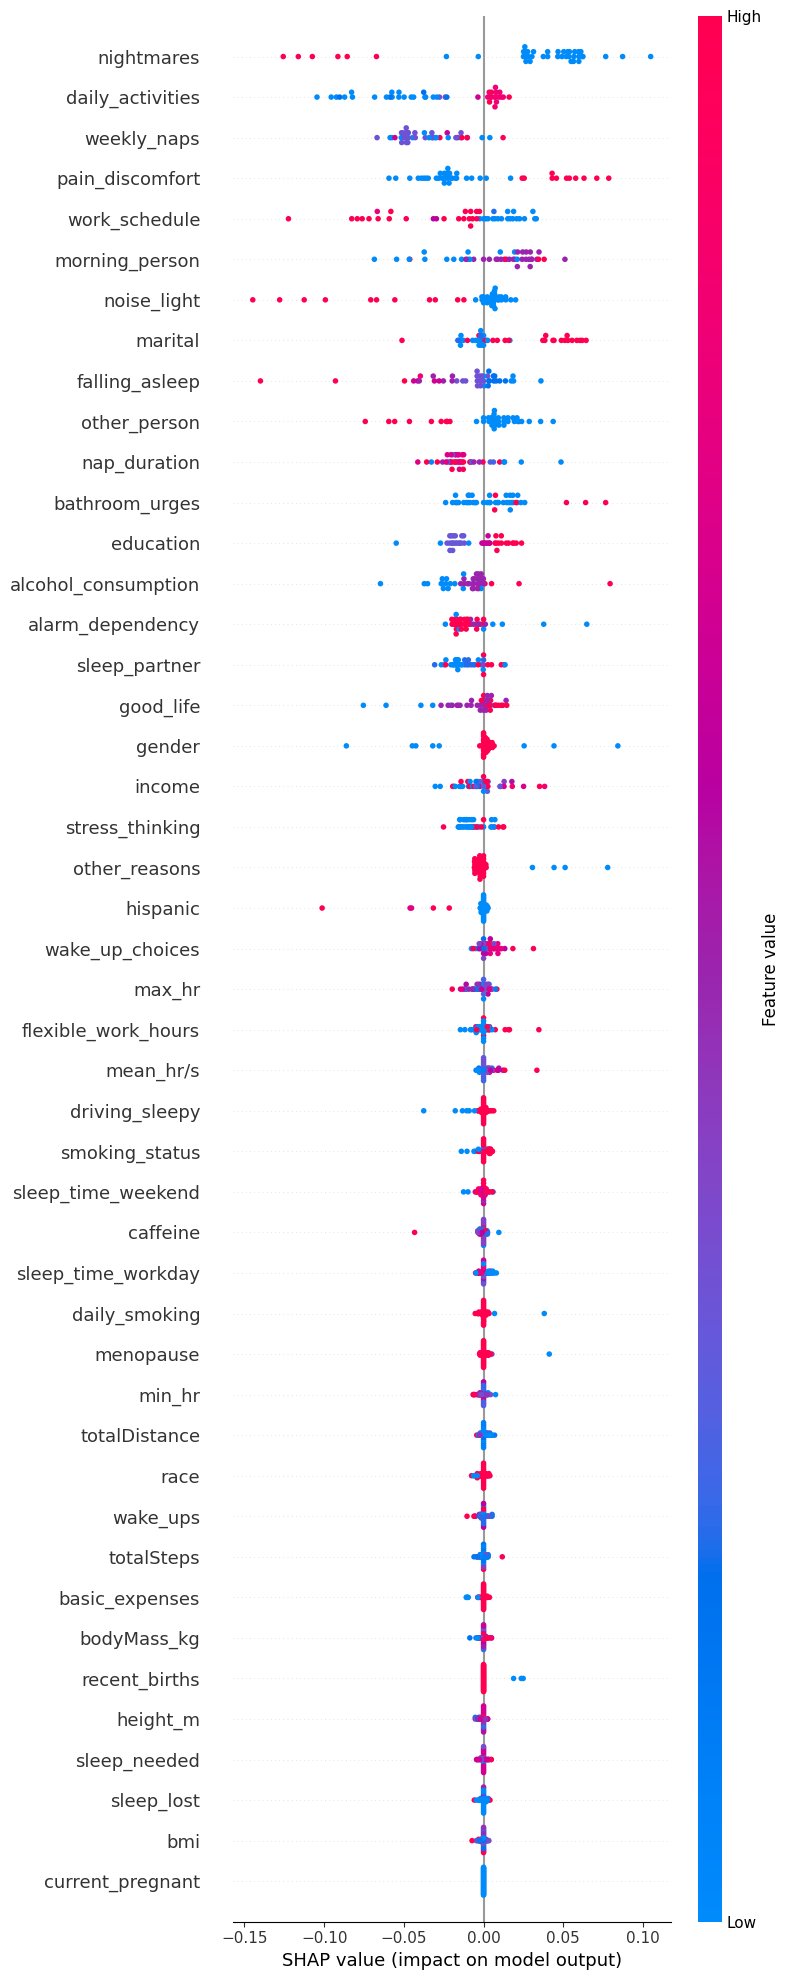

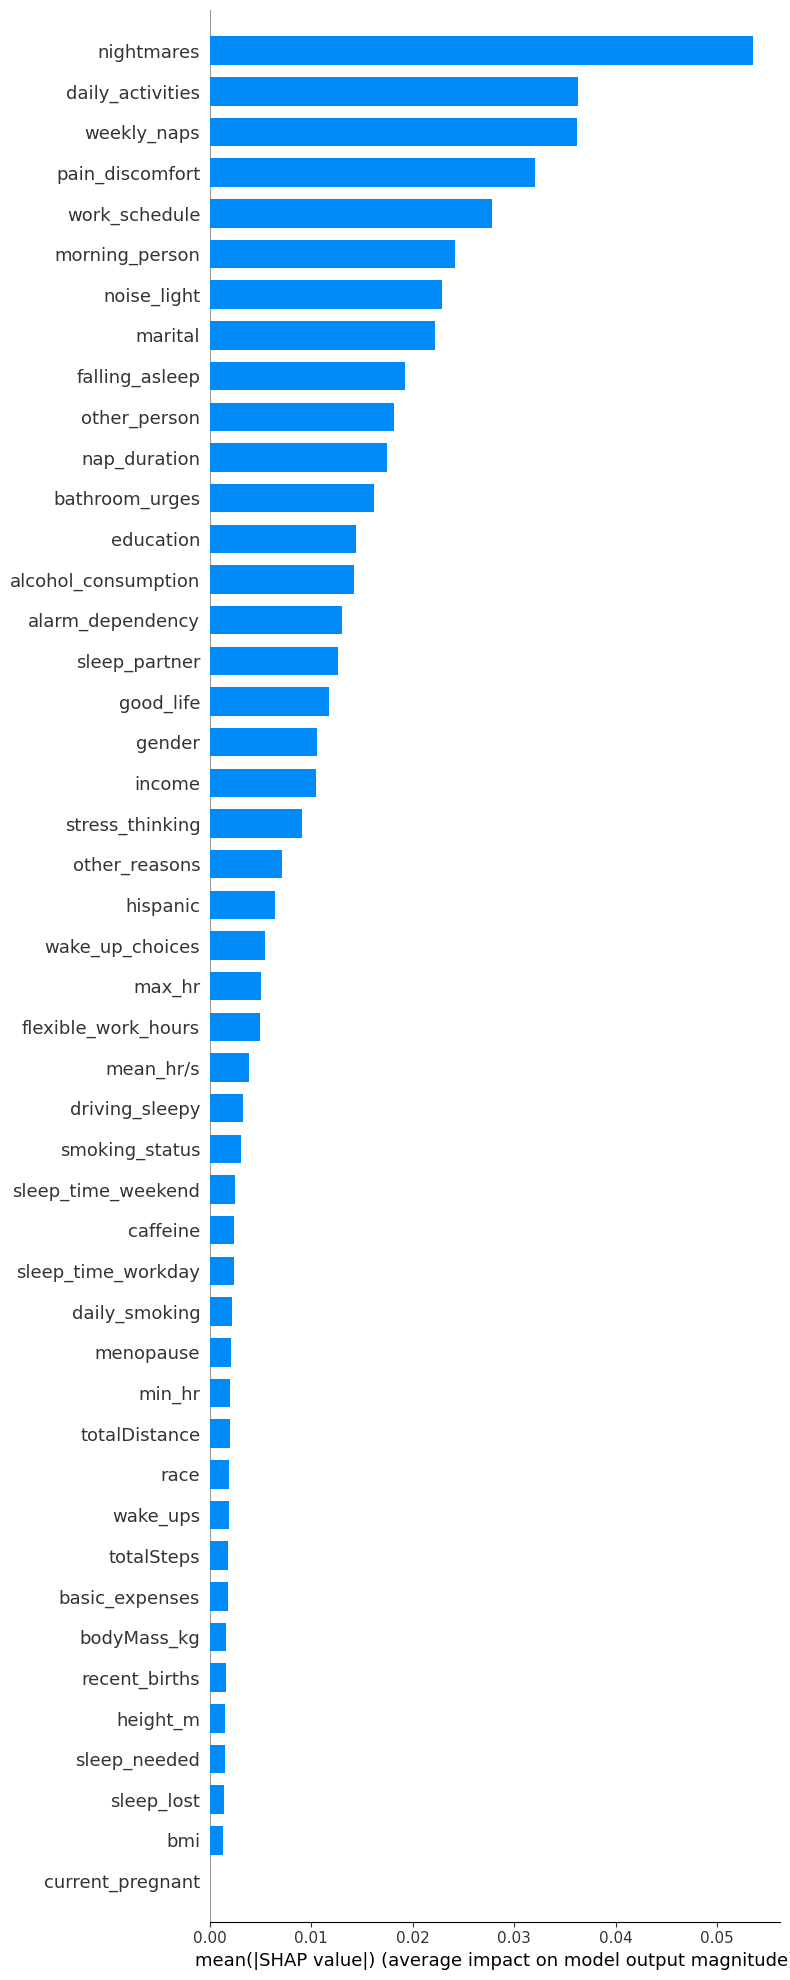

In [9]:
background = shap.sample(X_train, 100) # 100 random samples
explainer = shap.KernelExplainer(model_predict, background)

print(X_test[:50].shape)
print(X_test[:50])



shap_values = explainer.shap_values(X_test[:50])
shap_values = np.array(shap_values).squeeze(axis=2)

print(np.array(shap_values).shape)

shap.summary_plot(shap_values, X_test[:50], feature_names=feature_names, max_display=49)
shap.summary_plot(shap_values, X_test[:50], feature_names=feature_names, plot_type='bar', max_display=49)

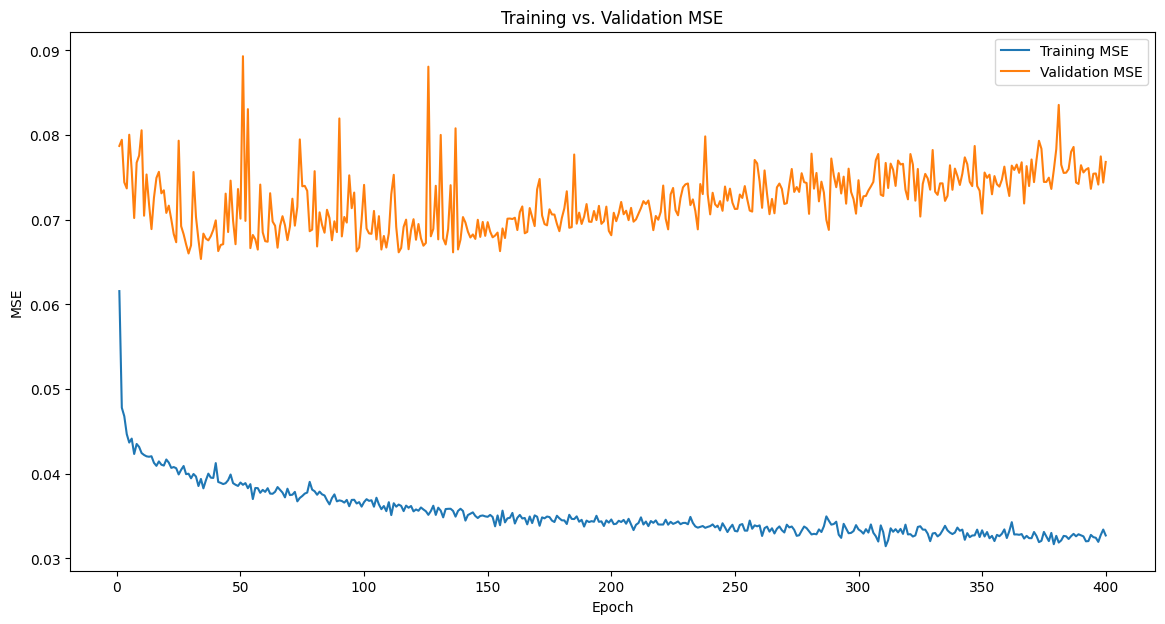

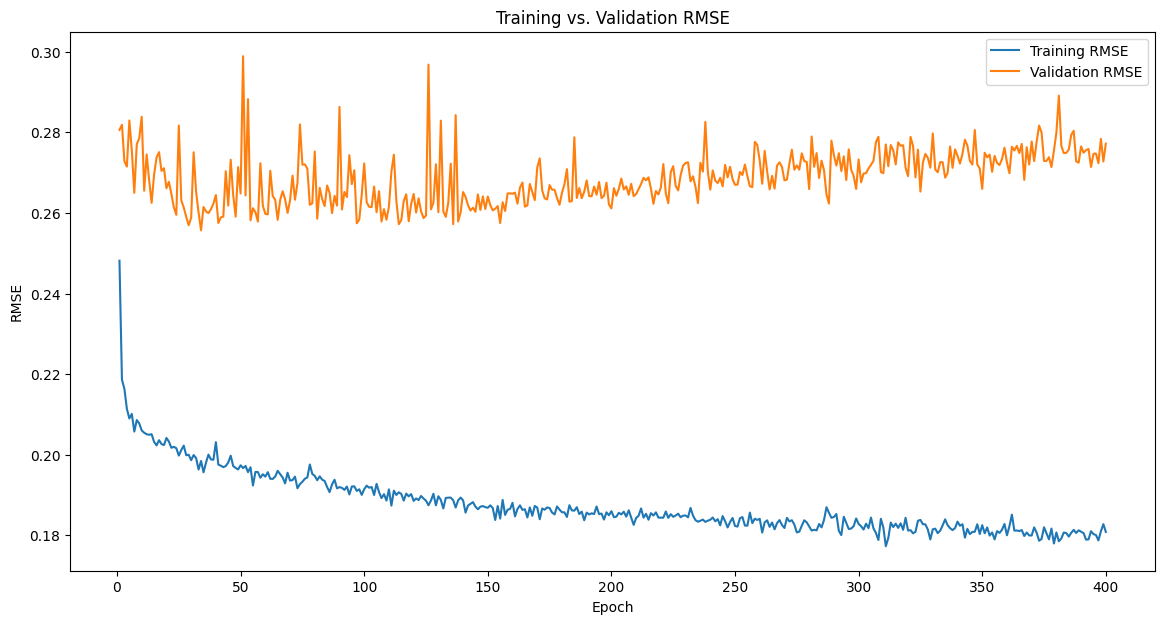

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_mse_history) + 1)

# Plotting the MSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_mse_history, label='Training MSE')
plt.plot(epochs, val_mse_history, label='Validation MSE')
plt.title('Training vs. Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the RMSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_rmse_history, label='Training RMSE')
plt.plot(epochs, val_rmse_history, label='Validation RMSE')
plt.title('Training vs. Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [ ]:
# Check the model's output shape
print(model.output_shape)


(None, 1)
